# Denoise Image using OpenCV

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
# set up the path for both training and testing data
data_address = os.path.join(os.getcwd(),'..', 'Data')
image_address = os.path.join(data_address, 'Coronahack-Chest-XRay-Dataset', 'Coronahack-Chest-XRay-Dataset')
training_label = pd.read_csv(os.path.join(data_address, 'training_label.csv'))
testing_label = pd.read_csv(os.path.join(data_address, 'testing_label.csv'))
train_images_normal = [os.path.join(image_address, 'train', filename) for filename in training_label[training_label.Label == 'Normal'].X_ray_image_name.tolist()]
train_images_sick = [os.path.join(image_address, 'train', filename) for filename in training_label[training_label.Label == 'Pnemonia'].X_ray_image_name.tolist()]
test_images_normal = [os.path.join(image_address, 'test', filename) for filename in testing_label[testing_label.Label == 'Normal'].X_ray_image_name.tolist()]
test_images_sick = [os.path.join(image_address, 'test', filename) for filename in testing_label[testing_label.Label == 'Pnemonia'].X_ray_image_name.tolist()]


In [3]:
# parameters:
number_of_figures = 100
path_draw = train_images_normal[:number_of_figures]
output_folder = "../Data/denoised_training_images_sample"
os.makedirs(output_folder, exist_ok=True)

## Denoise Images

In [17]:
denoise_res = []
# set up the figure size
plt.figure(figsize=(12, 8))
# plot the original images and denoised images
for i, v in enumerate(path_draw):
    try:
        img = cv2.imread(v, cv2.IMREAD_GRAYSCALE)  # Read the image as grayscale
        denoised_img = cv2.fastNlMeansDenoising(img, None, 20, 3, 7)  # h, templateWindowSize, searchWindowSize
        if len(denoise_res) <= 100:
            denoise_res.append(denoised_img)
        # Save the denoised image
        output_filename = os.path.join(output_folder, f"denoised_{i+1}.jpg")
        cv2.imwrite(output_filename, denoised_img)
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)
        continue


<Figure size 1200x800 with 0 Axes>

## Compare the images

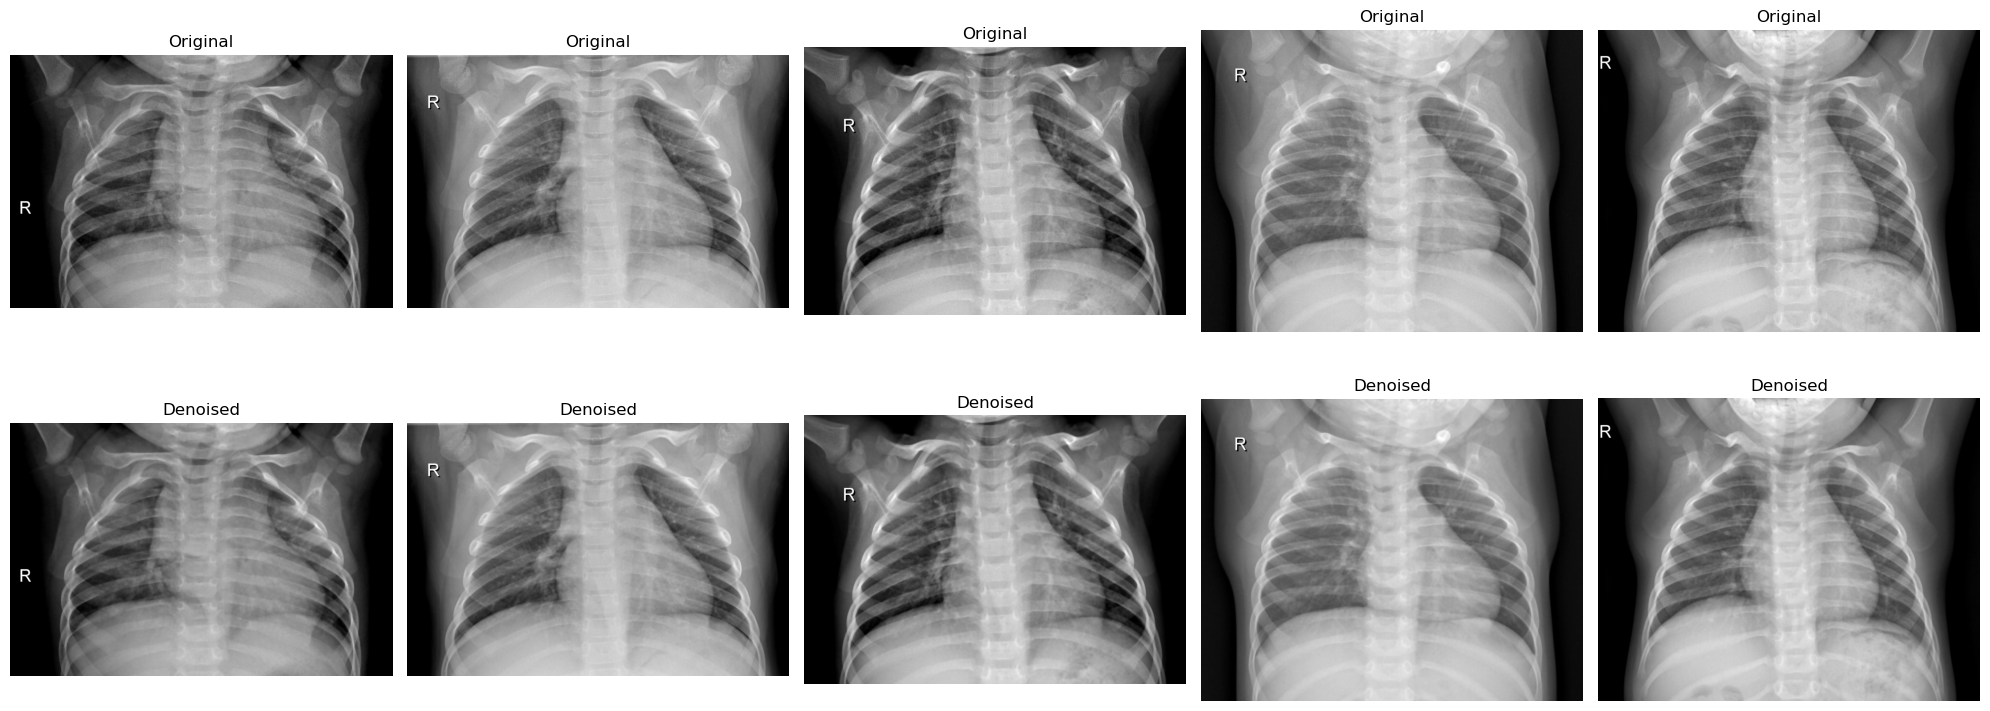

In [18]:
# parameters:
figures_to_draw = 5

# plot the original images and denoised images
path_draw = train_images_normal[:figures_to_draw]
# calculate the number of rows and columns based on the number of figures
num_rows = 2
num_cols = figures_to_draw
plt.figure(figsize=(4 * num_cols, 4 * num_rows))
# plot the original images and denoised images
for i, v in enumerate(path_draw):
    try:
        plt.subplot(num_rows, num_cols, i + 1)
        original_img = cv2.imread(v)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, num_cols + i + 1)
        denoised_img = denoise_res[i]
        plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
        plt.title('Denoised')
        plt.axis('off')
    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(e)
        continue

plt.tight_layout()
plt.show()



## Show average results

In [19]:
# making n X m matrix
def img2np(list_of_filename, size = (500, 500)):
    # iterating through each file
    for i,fn in enumerate(list_of_filename):
        current_image = image.load_img(fn, target_size = size, color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

## Image comparison
def find_mean_img(full_mat, title, size = (500, 500)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img


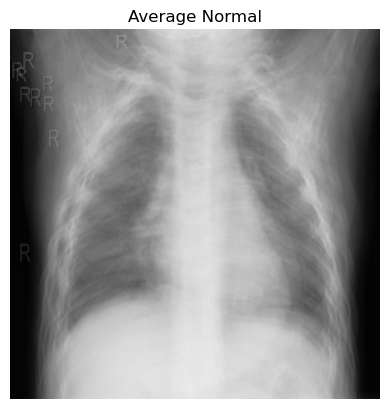

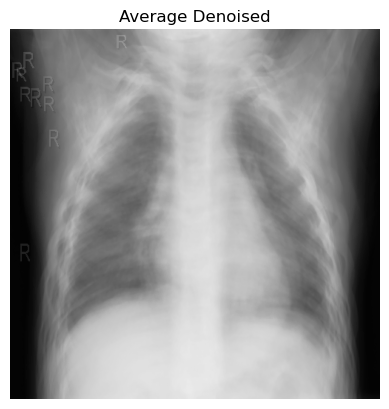

In [20]:
original_train = img2np(train_images_normal[:10])
norm_mean = find_mean_img(original_train, 'Normal')

denoised_train = img2np([os.path.join(output_folder, f"denoised_{i+1}.jpg") for i in range(10)])
denoised_mean = find_mean_img(denoised_train, 'Denoised')



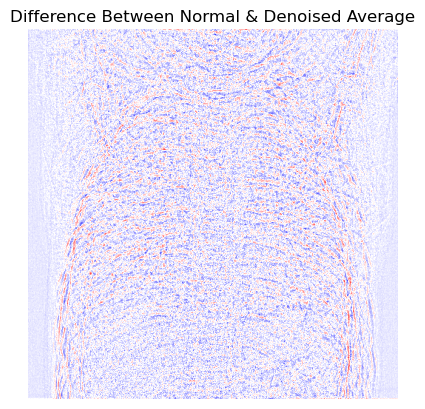

In [21]:
contrast_mean = norm_mean - denoised_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & Denoised Average')
plt.axis('off')
plt.show()

The image above suggests there are almost no differences between normal and denoised pictures